In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, ticker
from matplotlib.ticker import LinearLocator, FormatStrFormatter


# Task 1

Develop yourself using numpy library (for a function of two variables f(x,y)):

*   **a) a function to implement gradient descent (GD) algorithm**

In [2]:
# gradient descent for single var
def grad_descent(df, x_prev, sequence=None, learn_rate=1, eps=1e-6):
    if (sequence == None):
      sequence = np.array([x_prev])
    '''Approximate solution of f(x)=0 by Gradient Descent method.

    Parameters
    ----------
    df : function
        First derivative of f(x).
    x_prev : number
        Initial guess for a solution f(x)=0.
    learn_rate: number
        Step size of gradient descent.
    max_iter : integer
        Maximum number of iterations .
    eps : double
        epsilon threshold - stopping criteria

    Returns
    -------
    x_next : number
        The minimal value of function.
    sequence: array
        Intermidiate results of gradient descent
    grad_itter: number
        Number of iterations. '''
    
    # iterations number
    grad_iter = 1
    
    # vey first iteration of gradient descent
    x_next = x_prev - learn_rate*df(x_prev)
    sequence = np.append(sequence, x_next)

    # while abs(x_{t+1} - x_{t}) > threshold, keep iterating gradient descent
    while abs(x_next - x_prev) > eps:
        x_prev = x_next
        x_next = x_prev - learn_rate*df(x_prev)
        sequence = np.append(sequence, x_next)
        grad_iter += 1
        
    return (x_next, sequence, grad_iter)

In [3]:
def grad_descent_mult(df, x_prev, learn_rate=0.2, eps=0.0001):
    grad_itter = 1
    
    seq_x = []
    seq_y = []

    x_next = np.subtract(x_prev, learn_rate * df(x_prev[0], x_prev[1]))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next, x_prev)) > eps:
        
        x_prev = x_next
        x_next = x_prev - learn_rate * df(x_prev[0], x_prev[1])
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_itter, seq_x, seq_y)

*   **b) Adam's optimization algorithm**

In [4]:
class AdamOptim():

    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
        pass

    def update(self, t, w, b, dw, db):
        ## dw, db are from current mini-batch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b
        
    def show_info(self):
      oround = lambda args, digits=5: round(args, digits) if (type(args) in (int, float, complex) ) else [round(i, digits) for i in args]
      info = {
        'm_dw':     oround(self.m_dw),
        'v_dw':     oround(self.v_dw),
        'm_db':     oround(self.m_db),
        'v_db':     oround(self.v_db),
        'beta1':    oround(self.beta1),
        'beta2':    oround(self.beta2), 
        'epsilon':  oround(self.epsilon),
        'eta':      oround(self.eta)
      }
      print(info)
      return info

# Task 2

Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).

In [5]:
#set objective function
def f(x, y):
    return x**2 + y**2 + 1

# partial derivites
# for x
def dfdx(x):
    return 2*x
# for y
def dfdy(y):
    return 2*y
# for bias
def dfdb(b):
  return X**2 + Y**2 + b

# gradient vector (of all variables) [df/dx, df/dy]
def grad_vector(x,y):
    return np.array([dfdx(x), dfdy(y)])
def grad_bias(b, x, y):
  return np.array[f(x, y), b]

# loss function
def cost(x, y):
  return 

In [6]:
x = np.arange(-5, 5, 0.1)
# print(x)
y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
X, Y, Z

(array([[-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
        [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
        [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
        ...,
        [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
        [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
        [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9]]),
 array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
        [-4.75, -4.75, -4.75, ..., -4.75, -4.75, -4.75],
        [-4.5 , -4.5 , -4.5 , ..., -4.5 , -4.5 , -4.5 ],
        ...,
        [ 4.25,  4.25,  4.25, ...,  4.25,  4.25,  4.25],
        [ 4.5 ,  4.5 ,  4.5 , ...,  4.5 ,  4.5 ,  4.5 ],
        [ 4.75,  4.75,  4.75, ...,  4.75,  4.75,  4.75]]),
 array([[51.    , 50.01  , 49.04  , ..., 48.09  , 49.04  , 50.01  ],
        [48.5625, 47.5725, 46.6025, ..., 45.6525, 46.6025, 47.5725],
        [46.25  , 45.26  , 44.29  , ..., 43.34  , 44.29  , 45.26  ],
        ...,
        [44.0625, 43.0725, 42.1025, ..., 41.1525, 42.1025, 43.0725],
        [46.25  , 45.26  , 44.29 

c:\Profile\_source\vscode\yandex-test-demo\.venv\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


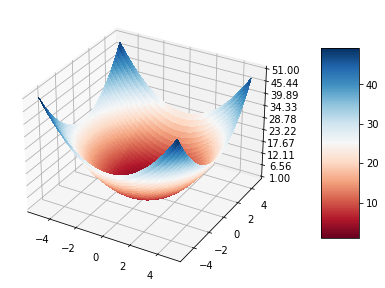

In [7]:
fig = plt.figure(1, figsize = (15, 5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

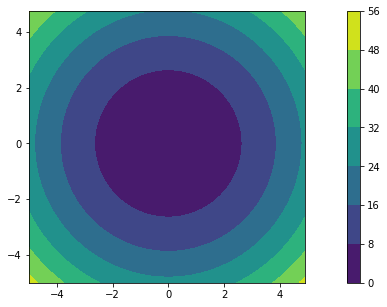

In [8]:
plt.figure(1, figsize = (15, 5))
plt.contourf(X, Y, Z)
plt.axis('scaled')
plt.colorbar()

- **by gradient descent algorithm**

In [9]:
grad_output = grad_descent_mult(grad_vector, np.array([6,2]), 0.2)

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])

Minimum (x,y) from gradient descent: [1.31621704e-04 4.38739013e-05]
Number of gradient descent iterations: 21


- **by Adam's algorithm**

In [10]:
eta = 0.1
epsilon = 1e-1
adam = AdamOptim(eta=eta, epsilon=epsilon)

# w_0 = 0
# b_0 = 0

w_0 = np.array([1, 1])
b_0 = np.array([0])

t = 1

prev_dif = 0

grad_dw = lambda X, Y: np.array([dfdx(X), dfdy(Y)])
grad_db = lambda b: np.array([dfdb(b)])

comparing = lambda a, b: a == b
multiComparing = lambda args1, args2: [(round(a1, 15) == round(a2, 15)) for a1, a2 in zip(args1, args2)]

while True:

    # dw, seq_w, iter_w = grad_descent(dfdx, w_0)
    # db, seq_d, iter_d = grad_descent(dfdy, b_0)

    # dw, grad_itter_w = grad_descent_mult(grad_dw, w_0)
    # db, grad_itter_b = grad_descent_mult(grad_db, b_0)

    dw = grad_vector(*w_0)
    # db = grad_bias(b_0)
    db = 0

    w_0_old = w_0
    w_0, b_0 = adam.update(t, w=w_0, b=b_0, dw=dw, db=db)

    if (any(multiComparing(w_0, w_0_old))):
        print('converged after '+str(t)+' iterations')
        break
    else:
        # adam.show_info()
        # print('iteration '+str(t)+': weight='+str(w_0), 'bias='+str(b_0)+'\n')
        t+=1
        pass

    continue

print(w_0)
adam.show_info()

converged after 568 iterations
[1.07853626e-13 1.07853626e-13]
{'m_dw': [0.0, 0.0], 'v_dw': [0.01113, 0.01113], 'm_db': 0.0, 'v_db': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 0.1, 'eta': 0.1}


{'m_dw': [0.0, 0.0],
 'v_dw': [0.01113, 0.01113],
 'm_db': 0.0,
 'v_db': 0.0,
 'beta1': 0.9,
 'beta2': 0.999,
 'epsilon': 0.1,
 'eta': 0.1}

Checking with library:

In [11]:
# from tensorflow.keras.optimizers import Adam

# # build the model
# model = baseline_model()
# model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = 0.0001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])

# # Fit the model
# history_Adam = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=0)

# Task 3

Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N

In [12]:
def show_dif2(seq_x, seq_y, title=None, getValues=False):
  sizeX = len(seq_x)
  sizeY = len(seq_y)
  if (sizeX != sizeY):
    raise Exception('Difference sizes of X and Y')

  i = 0
  xDiffs = []
  yDiffs = []
  while i < sizeX-1:
    xDiffs.append( abs(seq_x[i] - seq_x[i+1]) )
    yDiffs.append( abs(seq_y[i] - seq_y[i+1]) )
    i += 1
    continue

  plt.plot(xDiffs, color='g', label='X')
  plt.plot(yDiffs, color='b', label='Y')
  plt.legend()
  if title != None:
    plt.title(title)
  plt.show()

  if getValues:
    return xDiffs, yDiffs
  pass

, - **gradient descent**

In [13]:
def contour_plot(x_seq, y_seq, x1):
    plt.figure(1, figsize=(10, 5))
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0], x1[1], 'ro')
    
    plt.plot(x_seq, y_seq, 'ro')
    plt.show()
    pass

Minimum (x,y) from gradient descent: [1.31621704e-04 4.38739013e-05]
Number of gradient descent iterations: 21


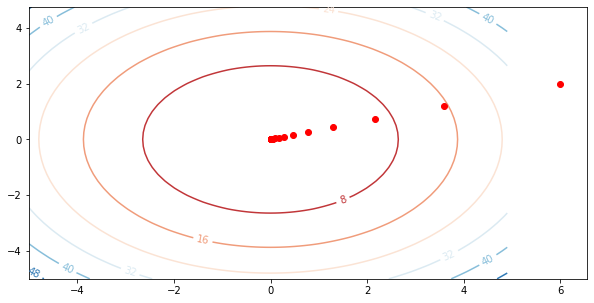

In [15]:
grad_output = grad_descent_mult(grad_vector, np.array([6,2]), 0.2)

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])

contour_plot(grad_output[2], grad_output[3], np.array([6,2]))

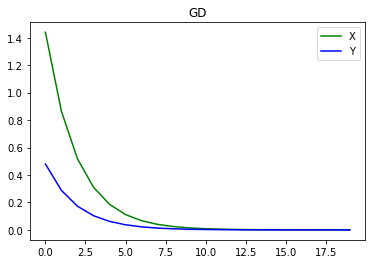

In [16]:
show_dif2(grad_output[2], grad_output[3], title='GD')

- **Adam's algorithm**

converged after 551 iterations
[-5.26557490e-12 -6.22765761e-13]
{'m_dw': [-0.0, 0.0], 'v_dw': [1.92128, 0.07305], 'm_db': 0.0, 'v_db': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 0.1, 'eta': 0.1}
[5.900826446280992, 5.801706219589017, 5.702671387630782, 5.603754657823759, 5.5049893091550075, 5.406409121472292, 5.308048302698615, 5.209941414471234, 5.1121232967085435, 5.014628991602983, 4.9174936675258545, 4.82075254331104, 4.724440813359818, 4.628593573979028, 4.533245751330655, 4.4384320313332974, 4.344186791816017, 4.250544037183587, 4.1575373358100824, 4.065199760335946, 3.9735638310029464, 3.882661462122359, 3.792523911735037, 3.703181734488105, 3.6146647377223013, 3.5270019407367084, 3.4402215371739517, 3.3543508604489833, 3.2694163521282453, 3.1854435331532853, 3.1024569777935573, 3.02048029020702, 2.9395360834839304, 2.859645961048676, 2.780830500296239, 2.703109238343651, 2.6265006597822214, 2.5510221863230846, 2.476690168236416, 2.4035198774931756, 2.3315255025272243, 2.260

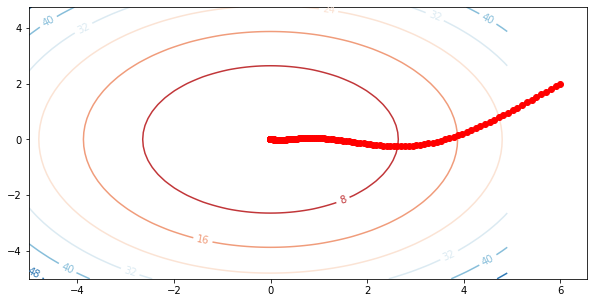

In [17]:
eta = 0.1
epsilon = 1e-1
adam = AdamOptim(eta=eta, epsilon=epsilon)

# w_0 = 0
# b_0 = 0

w_0 = np.array([6, 2])
b_0 = np.array([0])

t = 1

prev_dif = 0

grad_dw = lambda X, Y: np.array([dfdx(X), dfdy(Y)])
grad_db = lambda b: np.array([dfdb(b)])

comparing = lambda a, b: a == b
multiComparing = lambda args1, args2: [(round(a1, 15) == round(a2, 15)) for a1, a2 in zip(args1, args2)]

history_x = []
history_y = []

while True:

    # dw, seq_w, iter_w = grad_descent(dfdx, w_0)
    # db, seq_d, iter_d = grad_descent(dfdy, b_0)

    # dw, grad_itter_w = grad_descent_mult(grad_dw, w_0)
    # db, grad_itter_b = grad_descent_mult(grad_db, b_0)

    dw = grad_vector(*w_0)

    # history_x.append(dw[0])
    # db = grad_bias(b_0)
    db = 0

    w_0_old = w_0
    w_0, b_0 = adam.update(t, w=w_0, b=b_0, dw=dw, db=db)
    # history.append([w_0, b_0])
    history_x.append(w_0[0])
    history_y.append(w_0[1])

    if (any(multiComparing(w_0, w_0_old))):
        print('converged after '+str(t)+' iterations')
        break
    else:
        # adam.show_info()
        # print('iteration '+str(t)+': weight='+str(w_0), 'bias='+str(b_0)+'\n')
        t+=1
        pass

    continue

print(w_0)
adam.show_info()

print(history_x)
print(history_y)
contour_plot(history_x, history_y, np.array([6,2]))

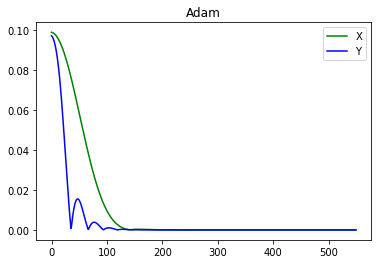

In [ ]:
show_dif2(history_x, history_y, title='Adam')